In [18]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

plt.style.use('classic')
mpl.rcParams['font.family'] = 'serif'

In [19]:
import FinanceDataReader as fdr

apple = fdr.DataReader('AAPL', '2010')
apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515212,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800
...,...,...,...,...,...,...
2022-11-16,149.130005,149.869995,147.289993,148.789993,148.789993,64218300
2022-11-17,146.429993,151.479996,146.149994,150.720001,150.720001,80389400
2022-11-18,152.309998,152.699997,149.970001,151.289993,151.289993,74794600


# 전략
## 단기이동평균선 > 장기이동평균선 : 매수
## 단기이동평균선 < 장기이동평균선 : 매도

<AxesSubplot:xlabel='Date'>

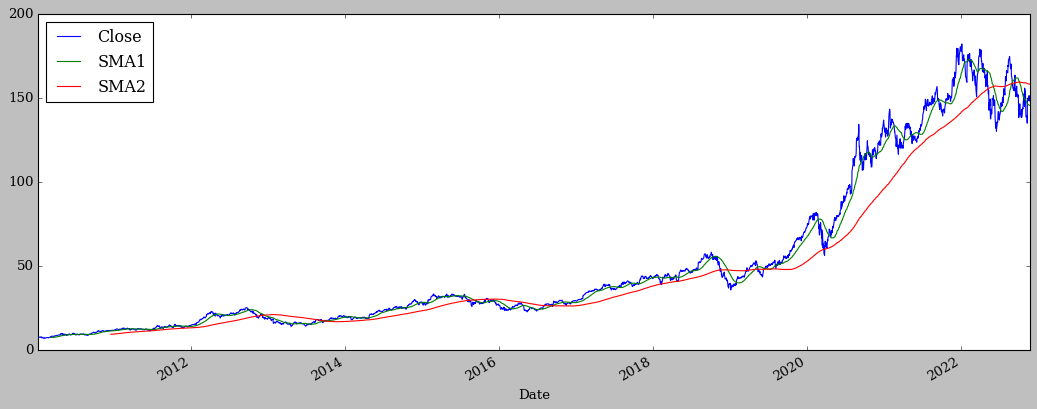

In [30]:
# 단기 이동평균선(42) 과 장기 이동평균선 계산(252)

SMA1 = 42
SMA2 = 242

# 이동평균선 계산
apple['SMA1'] = apple['Close'].rolling(SMA1).mean()
apple['SMA2'] = apple['Close'].rolling(SMA2).mean()

# 시각화
apple = apple[['Close', 'SMA1', 'SMA2']]
apple.plot(figsize=(16,6))

In [21]:
apple.dropna(inplace=True)

apple['Position'] = np.where(apple['SMA1'] > apple['SMA2'], 1, -1)
apple

C:\Users\an373\AppData\Local\Temp\ipykernel_11112\2011923027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple.dropna(inplace=True)
C:\Users\an373\AppData\Local\Temp\ipykernel_11112\2011923027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['Position'] = np.where(apple['SMA1'] > apple['SMA2'], 1, -1)


,Close,SMA1,SMA2,Position
Date,,,,
2010-12-16,11.473214,11.179039,9.185782,1
2010-12-17,11.450357,11.188495,9.201514,1
2010-12-20,11.507500,11.198427,9.217428,1
2010-12-21,11.578571,11.210910,9.234138,1
2010-12-22,11.612857,11.225952,9.251048,1
...,...,...,...,...
2022-11-16,148.789993,145.762618,158.218099,-1
2022-11-17,150.720001,145.615475,158.164215,-1
2022-11-18,151.289993,145.557618,158.120620,-1


(-1.2, 1.2)

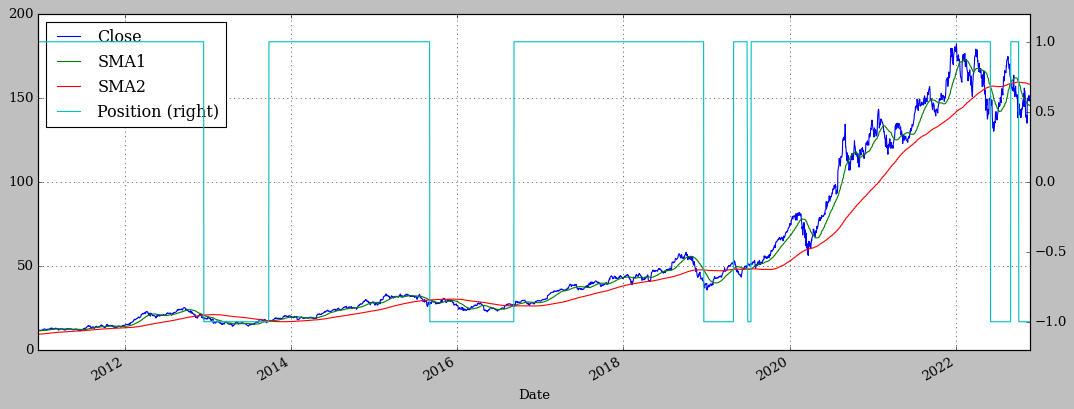

In [22]:
ax = apple.plot(secondary_y = 'Position', figsize=(16,6), grid=True)
plt.ylim(-1.2,1.2)

# 백테스팅

In [23]:
apple['Returns'] = np.log(apple['Close'] / apple['Close'].shift(1))
apple['Strategy'] = apple['Position'].shift(1) * apple['Returns']

C:\Users\an373\AppData\Local\Temp\ipykernel_11112\1913815698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['Returns'] = np.log(apple['Close'] / apple['Close'].shift(1))
C:\Users\an373\AppData\Local\Temp\ipykernel_11112\1913815698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['Strategy'] = apple['Position'].shift(1) * apple['Returns']


In [24]:
# 수익률 계산
np.exp(apple[['Returns', 'Strategy']].sum())

Returns     13.089618
Strategy     7.589538
dtype: float64

In [25]:
# 변동성 계산
apple[['Returns', 'Strategy']].std() *252 **0.5

Returns     0.288257
Strategy    0.288379
dtype: float64

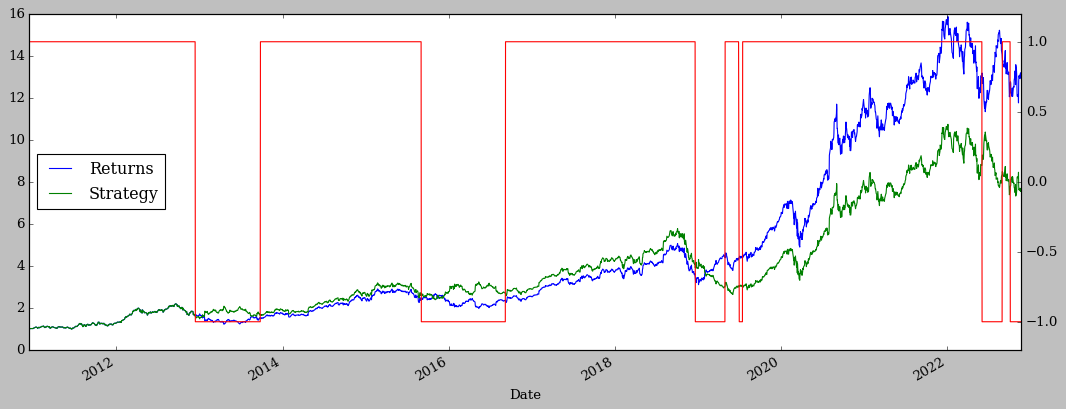

In [26]:
ax = apple[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(16,6))
apple['Position'].plot(ax=ax, secondary_y='Position', lw=1, color='r')
plt.ylim(-1.2,1.2)
ax.legend(loc='center left')

In [27]:
# 최적화
from itertools import product

sma1 = range(20,61,4)
sma2 = range(180, 281, 10)

results = pd.DataFrame()

apple = fdr.DataReader('AAPL', '2010')
for SMA1, SMA2 in product(sma1, sma2) :
    data = apple[['Close']]
    data.dropna(inplace=True)
    data['Returns'] = np.log(data['Close'] / data['Close'].shift(1))
    data['SMA1'] = data['Close'].rolling(SMA1).mean()
    data['SMA2'] = data['Close'].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns'] 
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    results = results.append(pd.DataFrame({
        'SMA1' : SMA1,
        'SMA2' : SMA2,
        'MARKET' : perf['Returns'],
        'STRATEGY' : perf['Strategy'],
        'OUT' : perf['Strategy'] - perf['Returns']
    }, index=[0]), ignore_index=True)

results

C:\Users\an373\AppData\Local\Temp\ipykernel_11112\3021967380.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\an373\AppData\Local\Temp\ipykernel_11112\3021967380.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Returns'] = np.log(data['Close'] / data['Close'].shift(1))
C:\Users\an373\AppData\Local\Temp\ipykernel_11112\3021967380.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,SMA1,SMA2,MARKET,STRATEGY,OUT
0,20,180,14.846732,4.811163,-10.035569
1,20,190,15.091299,5.312820,-9.778479
2,20,200,13.223395,6.842236,-6.381160
3,20,210,13.824183,8.038682,-5.785500
4,20,220,13.695414,8.456888,-5.238526
...,...,...,...,...,...
116,60,240,13.128851,7.592865,-5.535985
117,60,250,12.927049,7.023664,-5.903385
118,60,260,12.209047,6.657760,-5.551286
119,60,270,12.252090,5.600183,-6.651907


In [28]:
results.sort_values('OUT', ascending=False).head(7)

,SMA1,SMA2,MARKET,STRATEGY,OUT
101,56,200,13.223395,13.160629,-0.062767
111,60,190,15.091299,13.917938,-1.173361
112,60,200,13.223395,11.170425,-2.052970
56,40,190,15.091299,12.510354,-2.580945
110,60,180,14.846732,12.143846,-2.702886
91,52,210,13.824183,10.787636,-3.036547
100,56,190,15.091299,12.034070,-3.057229


# 전략
# 1일과 2일전 데이터로 오늘의 데이터를 예측하는 선형회귀

In [57]:
apple = fdr.DataReader('AAPL', '2010')[['Close']]

apple['returns'] = np.log(apple / apple.shift(1))
apple.dropna(inplace=True)
apple['direction'] = np.sign(apple['returns']).astype(int)

<AxesSubplot:>

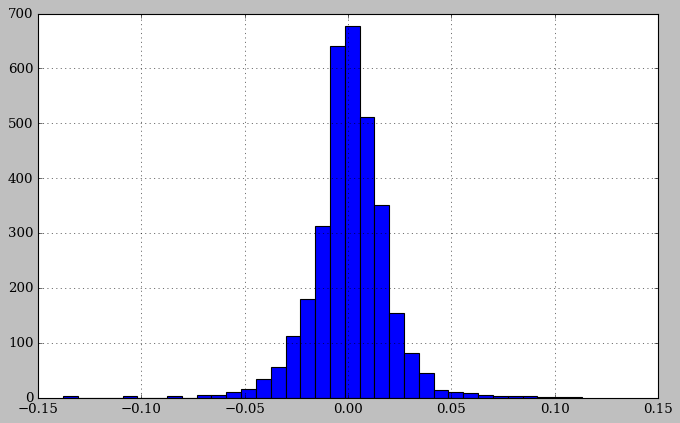

In [59]:
apple['returns'].hist(bins=35, figsize=(10,6))

In [62]:
def create_lags(data, lags) :
    global cols
    cols = []
    for lag in range(1, lags+1) :
        col = f'lag_{lag}'
        data[col] = data['returns'].shift(lag)
        cols.append(col)
        
create_lags(apple, 2)
apple

,Close,returns,direction,lag_1,lag_2
Date,,,,,
2010-01-05,7.656429,0.001727,1,NaN,NaN
2010-01-06,7.534643,-0.016034,-1,0.001727,NaN
2010-01-07,7.520714,-0.001850,-1,-0.016034,0.001727
2010-01-08,7.570714,0.006626,1,-0.001850,-0.016034
2010-01-11,7.503929,-0.008861,-1,0.006626,-0.001850
...,...,...,...,...,...
2022-11-16,148.789993,-0.008366,-1,0.011800,-0.009531
2022-11-17,150.720001,0.012888,1,-0.008366,0.011800
2022-11-18,151.289993,0.003775,1,0.012888,-0.008366


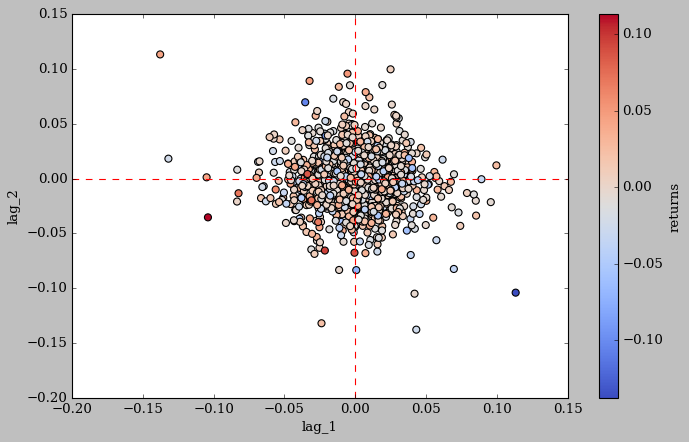

In [73]:
apple.dropna(inplace=True)
apple.plot.scatter(x='lag_1', y='lag_2', c='returns', cmap='coolwarm', figsize=(10,6), colorbar=True, s=40)
plt.axvline(0,c='r',ls='--')
plt.axhline(0,c='r',ls='--')

In [84]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# pos_ols_1 은 종속변수를 수익률에 두고 학습
# pos_ols_2 은 종속변수를 상승 or 하락에 두고 학습
apple['pos_ols_1'] = lr.fit(apple[cols], apple['returns']).predict(apple[cols])
apple['pos_ols_2'] = lr.fit(apple[cols], apple['direction']).predict(apple[cols])
apple

,Close,returns,direction,lag_1,lag_2,pos_ols_1,pos_ols_2
Date,,,,,,,
2010-01-07,7.520714,-0.001850,-1,-0.016034,0.001727,0.001742,0.083509
2010-01-08,7.570714,0.006626,1,-0.001850,-0.016034,0.001021,0.042206
2010-01-11,7.503929,-0.008861,-1,0.006626,-0.001850,0.000641,0.042702
2010-01-12,7.418571,-0.011440,-1,-0.008861,0.006626,0.001406,0.076715
2010-01-13,7.523214,0.014007,1,-0.011440,-0.008861,0.001499,0.065222
...,...,...,...,...,...,...,...
2022-11-16,148.789993,-0.008366,-1,0.011800,-0.009531,0.000376,0.026417
2022-11-17,150.720001,0.012888,1,-0.008366,0.011800,0.001393,0.081156
2022-11-18,151.289993,0.003775,1,0.012888,-0.008366,0.000326,0.025814


In [85]:
apple[['pos_ols_1', 'pos_ols_2']] = np.where(apple[['pos_ols_1', 'pos_ols_2']] > 0, 1, -1)

In [87]:
apple['pos_ols_1'].value_counts()

 1    2911
-1     332
Name: pos_ols_1, dtype: int64

In [88]:
apple['pos_ols_2'].value_counts()

 1    3091
-1     152
Name: pos_ols_2, dtype: int64

In [91]:
# 다수의 매수매도
(apple['pos_ols_1'].diff() != 0).sum()

589

In [93]:
(apple['pos_ols_2'].diff() != 0).sum()

301

# 백테스팅

In [96]:
apple['start_ols_1'] = apple['pos_ols_1'] * apple['returns']
apple['start_ols_2'] = apple['pos_ols_2'] * apple['returns']

apple[['returns', 'start_ols_1', 'start_ols_2']].sum().apply(np.exp)

returns        19.931932
start_ols_1    25.051798
start_ols_2    46.395834
dtype: float64

In [98]:
# 예측의 정확도
(apple['direction'] == apple['pos_ols_1']).value_counts()

True     1719
False    1524
dtype: int64

In [99]:
(apple['direction'] == apple['pos_ols_2']).value_counts()

True     1728
False    1515
dtype: int64

<AxesSubplot:xlabel='Date'>

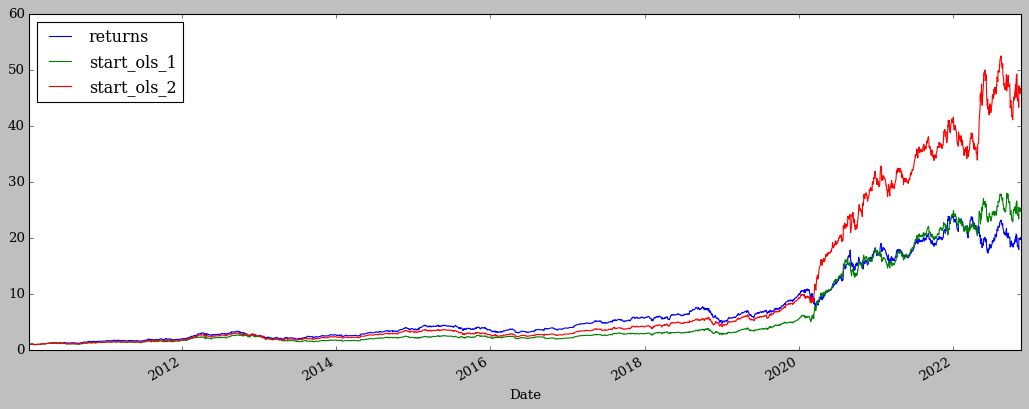

In [101]:
apple[['returns', 'start_ols_1', 'start_ols_2']].cumsum().apply(np.exp).plot(figsize=(16,6))